In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('../Resources/elektronisk-rapportering-ers-2018-fangstmelding-dca-simple.csv', delimiter=';')

In [3]:
print(df.sample(5))

        Melding ID Meldingstidspunkt Meldingsdato Meldingsklokkeslett  \
15415      1509426  21.01.2018 23:31   21.01.2018               23:31   
28226      1519842  03.02.2018 18:34   03.02.2018               18:34   
124554     1652031  17.05.2018 21:16   17.05.2018               21:16   
105200     1603521  26.04.2018 20:38   26.04.2018               20:38   
199108     1709948  07.08.2018 22:06   07.08.2018               22:06   

          Starttidspunkt   Startdato Startklokkeslett Startposisjon bredde  \
15415   21.01.2018 12:55  21.01.2018            12:55               72,806   
28226   03.02.2018 00:48  03.02.2018            00:48               58,207   
124554  17.05.2018 05:16  17.05.2018            05:16               61,851   
105200  26.04.2018 14:33  26.04.2018            14:33                57,25   
199108  07.08.2018 03:57  07.08.2018            03:57               59,769   

       Startposisjon lengde  Hovedområde start (kode)  ... Art - FDIR  \
15415              

In [4]:
df.dtypes

Melding ID                    int64
Meldingstidspunkt            object
Meldingsdato                 object
Meldingsklokkeslett          object
Starttidspunkt               object
Startdato                    object
Startklokkeslett             object
Startposisjon bredde         object
Startposisjon lengde         object
Hovedområde start (kode)    float64
Hovedområde start            object
Lokasjon start (kode)       float64
Havdybde start                int64
Stopptidspunkt               object
Stoppdato                    object
Stoppklokkeslett             object
Varighet                      int64
Fangstår                      int64
Stopposisjon bredde          object
Stopposisjon lengde          object
Hovedområde stopp (kode)    float64
Hovedområde stopp            object
Lokasjon stopp (kode)       float64
Havdybde stopp                int64
Trekkavstand                float64
Redskap FAO (kode)           object
Redskap FAO                  object
Redskap FDIR (kode)         

In [5]:
df['Starttidspunkt'] = pd.to_datetime(df['Starttidspunkt'], format='mixed')

In [6]:
unique = df['Fartøylengde'].unique()
print(unique)

['133,88' '56,8' '19,1' '49,95' '27,49' '46,58' '24,27' '56,2' '51,3'
 '23,27' '27,4' '51,2' '81,2' '46,57' '75,5' '39,79' '44,85' '42,07'
 '50,8' '45,65' '65' '20,93' '84,21' '58' '74,7' '60' '53,1' '26,4' '50,2'
 '55' '57,3' '64,7' '69,7' '54,6' '64' '23,9' '19,48' '20,21' '18,52' '22'
 '15,36' '22,5' '15,5' '27,43' '33,63' '18,05' '16,88' '40,3' '19,42'
 '28,1' '17,59' '17,67' '36,26' '25,5' '20,48' '32,55' '25,84' '38,7'
 '19,26' '51,7' '18,4' '25,07' '17,84' '23,1' '22,05' '27,13' '31,7'
 '33,95' '74' '19,9' '23,95' '34,99' '16,1' '22,15' '20,99' '26,2' '27,47'
 '18,25' '26,5' '17' '21,34' '39,94' '34' '21,3' '49,48' '44,8' '38,08'
 '38,78' '19,68' '23,79' '30,35' '68,8' '18,8' '16,24' '15,44' '18,03'
 '18,6' '68,3' '39,9' '74,2' '27,97' '60,9' '56' '38,24' '53,55' '23'
 '27,96' '43,2' '26,25' '44,95' '66,28' '76,4' '45,42' '38,1' '19,95'
 '34,07' '36,39' '59,75' '69,8' '67,4' '33,46' '61,75' '23,56' '24,05'
 '26' '19,8' '40,6' '27,15' '37,9' '74,8' '34,85' '27,42' '70' '69,77'
 '

In [7]:
df['Fartøylengde'] = pd.to_numeric(df['Fartøylengde'].str.replace(',', '.'))
df['Bredde'] = pd.to_numeric(df['Bredde'].str.replace(',', '.'))
df['Startposisjon bredde'] = pd.to_numeric(df['Startposisjon bredde'].str.replace(',', '.'))
df['Startposisjon lengde'] = pd.to_numeric(df['Startposisjon lengde'].str.replace(',', '.'))
df['Startposisjon bredde'] = pd.to_numeric(df['Stopposisjon bredde'].str.replace(',', '.'))
df['Stopposisjon lengde'] = pd.to_numeric(df['Stopposisjon lengde'].str.replace(',', '.'))

df.dtypes

Melding ID                           int64
Meldingstidspunkt                   object
Meldingsdato                        object
Meldingsklokkeslett                 object
Starttidspunkt              datetime64[ns]
Startdato                           object
Startklokkeslett                    object
Startposisjon bredde               float64
Startposisjon lengde               float64
Hovedområde start (kode)           float64
Hovedområde start                   object
Lokasjon start (kode)              float64
Havdybde start                       int64
Stopptidspunkt                      object
Stoppdato                           object
Stoppklokkeslett                    object
Varighet                             int64
Fangstår                             int64
Stopposisjon bredde                 object
Stopposisjon lengde                float64
Hovedområde stopp (kode)           float64
Hovedområde stopp                   object
Lokasjon stopp (kode)              float64
Havdybde st

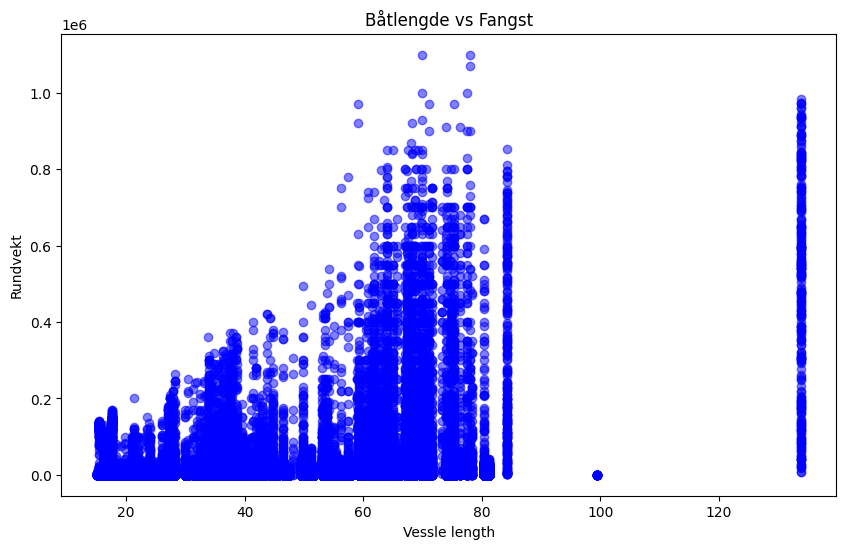

In [8]:
# Plot scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df['Fartøylengde'], df['Rundvekt'], color='blue', alpha=0.5)  # alpha just controls transparency
plt.title('Båtlengde vs Fangst')
plt.xlabel('Vessle length')
plt.ylabel('Rundvekt')
plt.show()

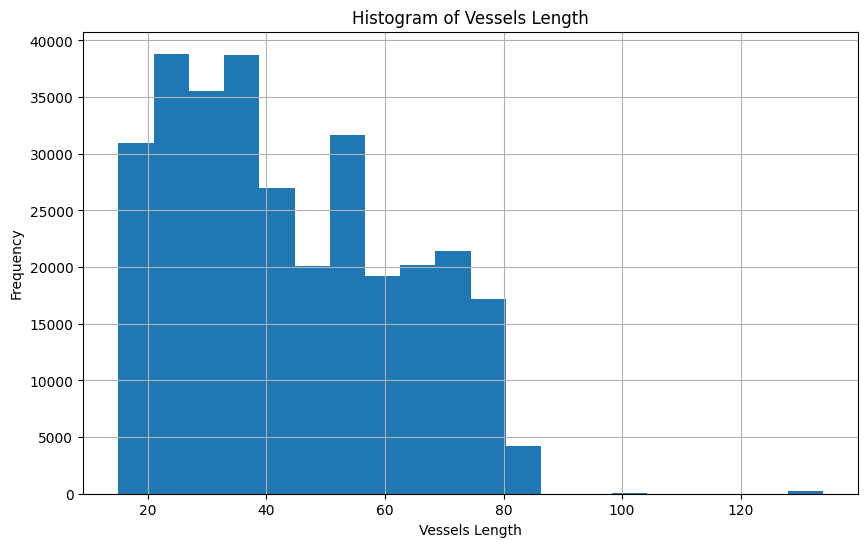

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(df['Fartøylengde'], bins=20)
plt.title('Histogram of Vessels Length')
plt.xlabel('Vessels Length')
plt.ylabel('Frequency')

plt.grid(True)
plt.show()

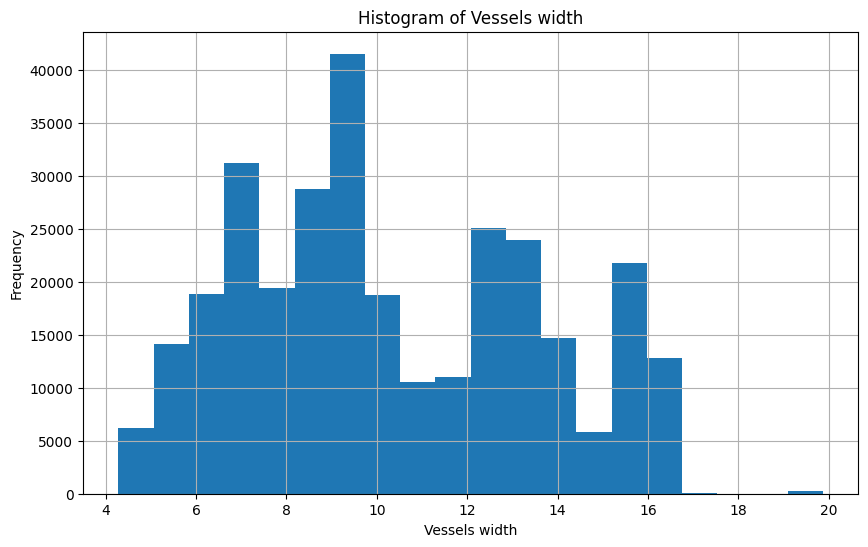

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df['Bredde'], bins=20)
plt.title('Histogram of Vessels width')
plt.xlabel('Vessels width')
plt.ylabel('Frequency')

plt.grid(True)
plt.show()

In [11]:
unique = df['Art - FDIR'].unique()
print(unique)

['Antarktisk krill' 'Hyse' 'Torsk' 'Blåkveite' 'Sei' 'Flekksteinbit'
 'Kveite' 'Snabeluer' 'Uer (vanlig)' 'Rødspette' 'Snøkrabbe' 'Lange'
 'Blåsteinbit' 'Breiflabb' 'Akkar' 'Hvitting' 'Lysing' nan 'Brosme'
 'Annen marin fisk' 'Antarktisk tannfisk' 'Steinbiter' 'Dypvannsreke'
 'Skate, uspes.' 'Reke av  Pandalusslekten' 'Øyepål' 'Smørflyndre'
 'Stortare' 'Annen skate og rokke' 'Lyr' 'Sjøkreps'
 'Vanlig ti-armet blekksprut, uspes.' 'Pigghå' 'Pink cusk-eel *'
 'Glassvar' 'Brisling' 'Isgalt' 'Gråsteinbit' 'Storskate' 'Sild'
 'Blålange' 'Skater, uspes.' 'Annen flyndre' 'Gapeflyndre' 'Skrubbe'
 'Makrell' 'Hestmakrell' 'Vassild' 'Kolmule' 'Lomre'
 'Annen vanlig ti-armet blekksprut' 'Hågjel' 'Kongekrabbe' 'Skjellbrosme'
 'Uer, uspes.' 'Havmus' 'Piggvar' 'Rognkjeks (felles)' 'Lodde'
 'Strømsild/Vassild' 'Reke av  Palaemonidaeslekten' 'Slettvar' 'Piggskate'
 'Sagtang' 'Southern hake *' 'Nise' 'Håbrann' 'Knurr' 'Sandflyndre'
 'Skolest' 'Rødknurr' 'Svarthå' 'Strømsild' 'Sølvtorsk' 'Annen blekksprut

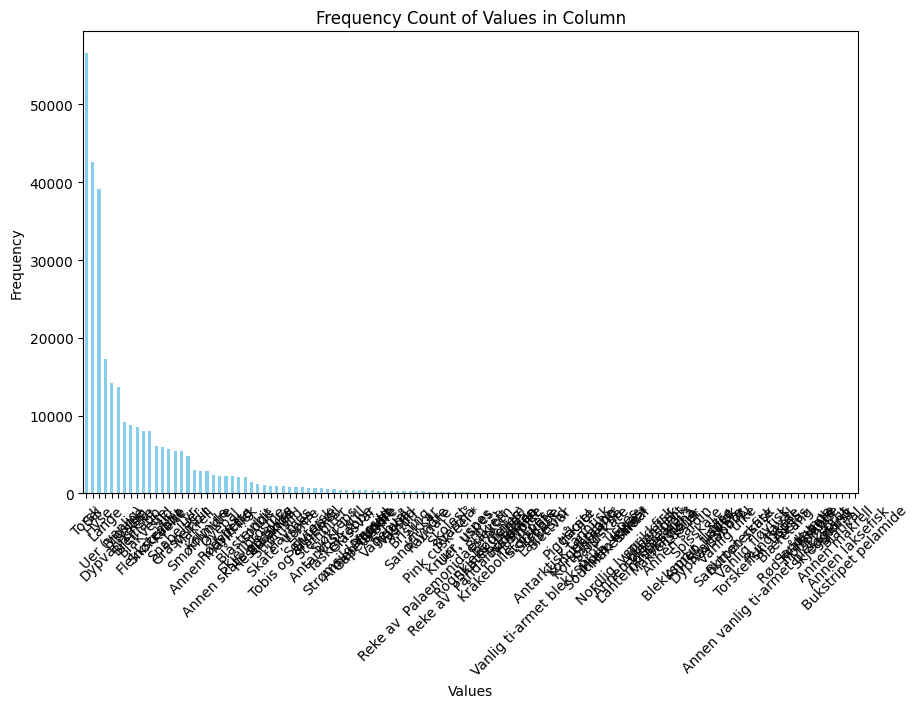

In [12]:
# Forutsetter at du har et DataFrame kalt df med kolonnen du vil telle frekvensen for

# Get frequency counts of values in the column
frequency_counts = df['Art - FDIR'].value_counts()

# Plot bar plot using Pandas built-in plotting
plt.figure(figsize=(10, 6))
frequency_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency Count of Values in Column')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

plt.show()


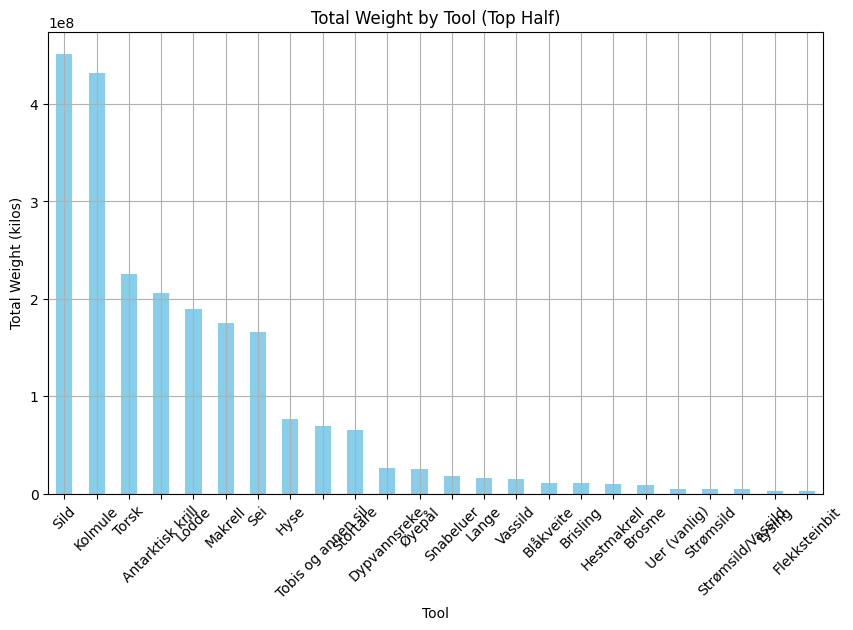

In [13]:
# Group the data by "Redskap" and sum the "Rundvekt" for each group
tool_weight = df.groupby('Art - FDIR')['Rundvekt'].sum()

# Sort the summed weights in descending order
sorted_tool_weight = tool_weight.sort_values(ascending=False)

# Select the top half of the sums
top_half = sorted_tool_weight.head(len(sorted_tool_weight) // 5)

# Plot bar plot
plt.figure(figsize=(10, 6))
top_half.plot(kind='bar', color='skyblue')
plt.title('Total Weight by Tool (Top Half)')
plt.xlabel('Tool')
plt.ylabel('Total Weight (kilos)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(True)
plt.show()

In [14]:
unique = df['Redskap FDIR'].unique()
print(unique)

['Flytetrål' 'Bunntrål' 'Snurrevad' 'Teiner' 'Udefinert garn'
 'Andre liner' 'Dobbeltrål' 'Udefinert trål' 'Bunntrål par' 'Reketrål'
 'Annet' 'Snurpenot/ringnot' 'Flytetrål par' 'Settegarn' nan 'Juksa/pilk'
 'Harpun og lignende uspesifiserte typer' 'Dorg/harp/snik']


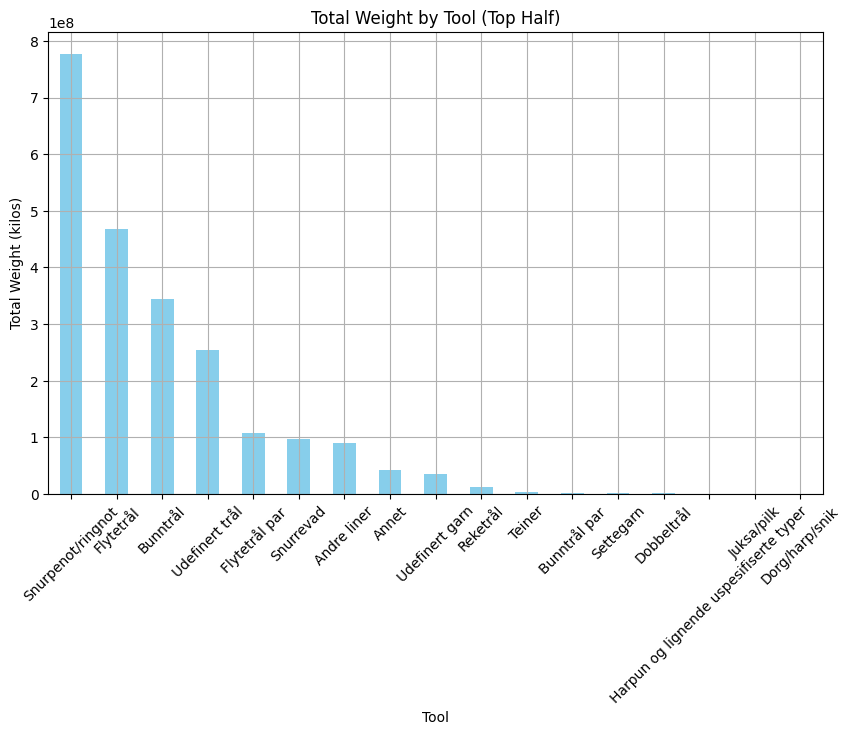

In [15]:
# Group the data by "Redskap" and sum the "Rundvekt" for each group
tool_weight = df.groupby('Redskap FDIR')['Rundvekt'].sum()

# Sort the summed weights in descending order
sorted_tool_weight = tool_weight.sort_values(ascending=False)

# Plot bar plot
plt.figure(figsize=(10, 6))
sorted_tool_weight.plot(kind='bar', color='skyblue')
plt.title('Total Weight by Tool (Top Half)')
plt.xlabel('Tool')
plt.ylabel('Total Weight (kilos)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(True)
plt.show()

In [16]:
reports = df.groupby('Melding ID')

In [17]:
reports_weight = reports['Rundvekt'].sum()
reports_boat_length = reports['Fartøylengde'].mean()

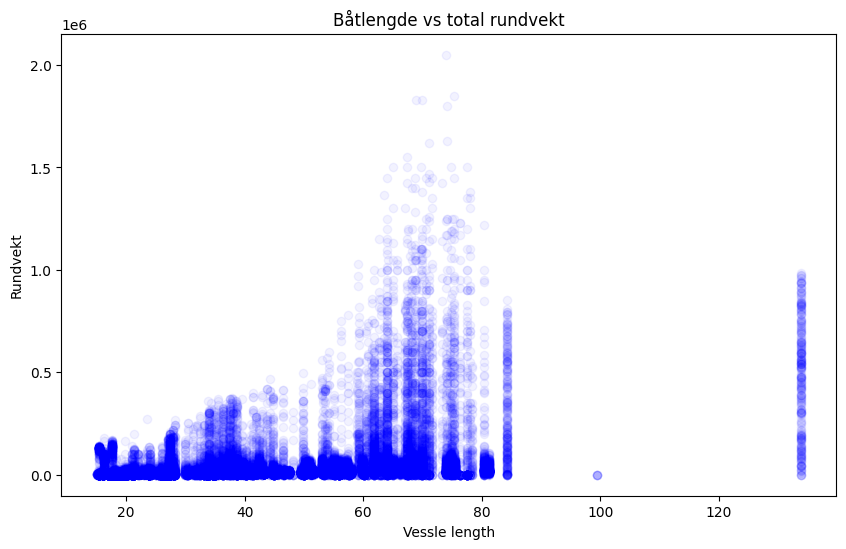

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(reports_boat_length, reports_weight, color='blue', alpha=0.05)  # alpha just controls transparency
plt.title('Båtlengde vs total rundvekt')
plt.xlabel('Vessle length')
plt.ylabel('Rundvekt')
plt.show()

In [19]:
reports_duration = reports['Varighet'].mean()

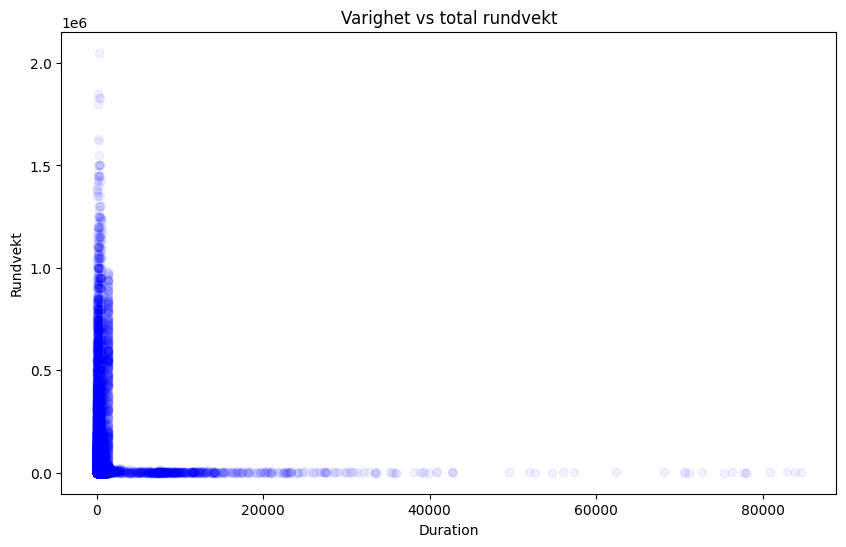

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(reports_duration, reports_weight, color='blue', alpha=0.05)  # alpha just controls transparency
plt.title('Varighet vs total rundvekt')
plt.xlabel('Duration')
plt.ylabel('Rundvekt')
plt.show()

In [21]:
# Drop all rows with missing starttimer
df = df.dropna(subset=['Starttidspunkt'])

# Sum the weight of each species and sort
species_total_weight = df.groupby('Art - FDIR')['Rundvekt'].sum()
sorted_species_by_weight = species_total_weight.sort_values(ascending=False);

In [22]:
num_graphs = 3
for x in range(num_graphs):
    selected_species = sorted_species_by_weight

C:\Users\th0ma\AppData\Local\Temp\ipykernel_17180\570746499.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_species_range['hour'] = df_species_range['Starttidspunkt'].dt.hour
C:\Users\th0ma\AppData\Local\Temp\ipykernel_17180\570746499.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_species_range['Normalized Weight'] = df_species_range['Rundvekt'] / species_weight_sum * 100
C:\Users\th0ma\AppData\Local\Temp\ipykernel_17180\570746499.py:26: SettingWithCopyWarning: 
A value is trying to be set 

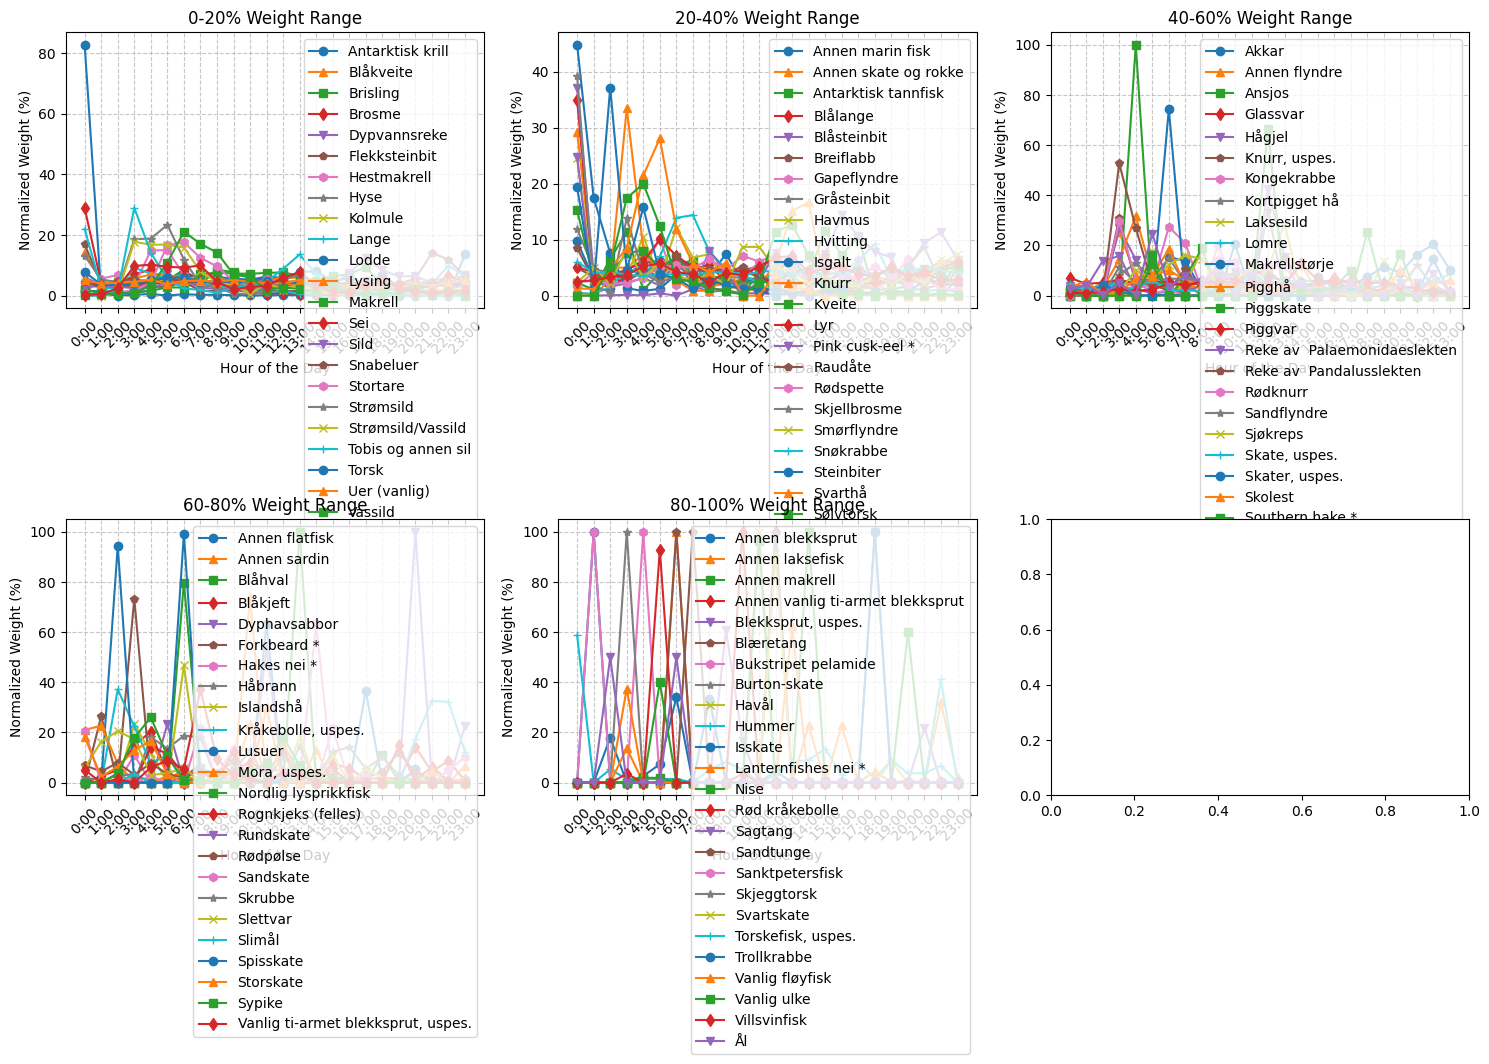

In [23]:
import matplotlib.pyplot as plt

# Define the marker styles
marker_styles = ['o', '^', 's', 'd', 'v', 'p', 'h', '*', 'x', '+']

# Define the percentile ranges
percentile_ranges = [(0, 20), (20, 40), (40, 60), (60, 80), (80, 100)]

# Define the number of rows and columns for the grid
num_rows = 2
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Loop over each percentile range
for i, (start_percentile, end_percentile) in enumerate(percentile_ranges):
    # Get the species within the percentile range
    start_index = int(len(species_total_weight) * start_percentile / 100)
    end_index = int(len(species_total_weight) * end_percentile / 100)
    species_range = species_total_weight.nlargest(end_index).iloc[start_index:end_index]

    # Filter the DataFrame for the species within the range
    df_species_range = df[df['Art - FDIR'].isin(species_range.index)]

    # Extract hour from starttime
    df_species_range['hour'] = df_species_range['Starttidspunkt'].dt.hour

    # Calculate the sum of weights for each species
    species_weight_sum = df_species_range.groupby('Art - FDIR')['Rundvekt'].transform('sum')

    # Normalize weight
    df_species_range['Normalized Weight'] = df_species_range['Rundvekt'] / species_weight_sum * 100

    hourly_catch_by_species = df_species_range.groupby(['Art - FDIR', 'hour'])['Normalized Weight'].sum().unstack().fillna(0)

    # Plotting
    row = i // num_cols
    col = i % num_cols

    for j, species in enumerate(hourly_catch_by_species.index):
        marker_style = marker_styles[j % len(marker_styles)]  # Cycle through marker styles
        axs[row, col].plot(hourly_catch_by_species.columns, hourly_catch_by_species.loc[species], 
                           marker=marker_style, label=species)

    axs[row, col].set_title(f'{start_percentile}-{end_percentile}% Weight Range')
    axs[row, col].set_xlabel('Hour of the Day')
    axs[row, col].set_ylabel('Normalized Weight (%)')
    axs[row, col].set_xticks(range(24))
    axs[row, col].set_xticklabels([f"{h}:00" for h in range(24)], rotation=45)
    axs[row, col].legend(loc='upper right')
    axs[row, col].grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()


In [30]:
import seaborn as sns
import geopandas as gpd
import contextily as ctx

C:\Users\th0ma\AppData\Local\Temp\ipykernel_17180\3414286241.py:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


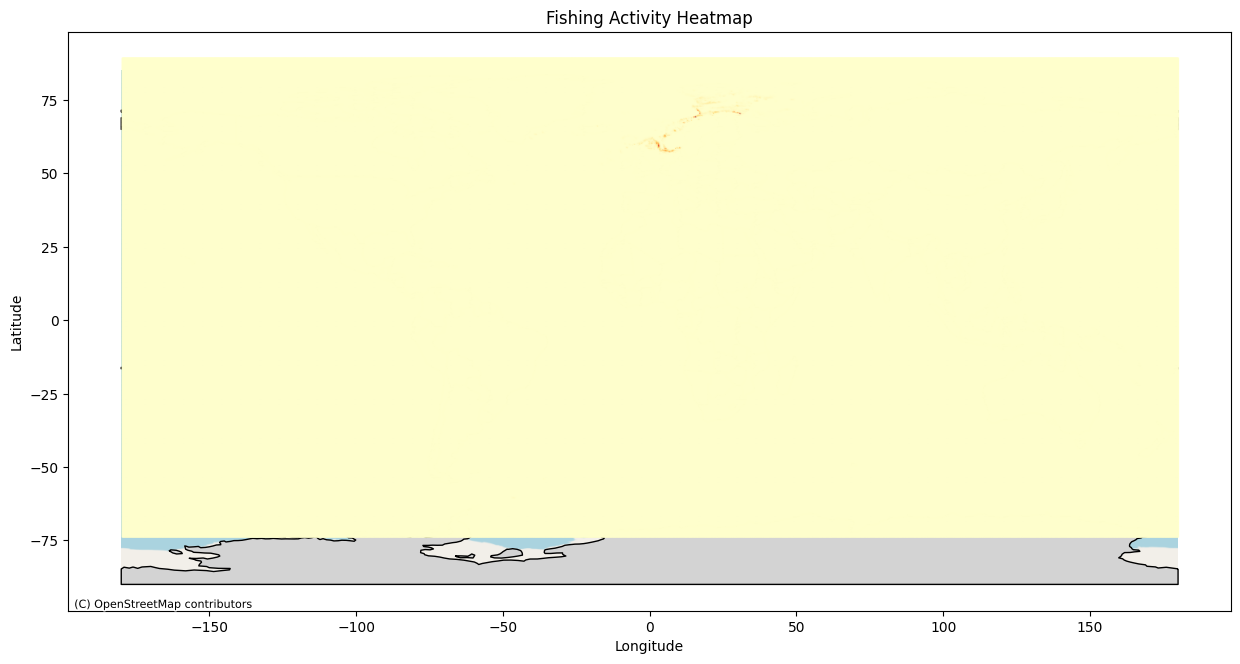

In [31]:
# Rename columns for easier access
df.rename(columns={'Startposisjon bredde': 'start_lat', 
                   'Startposisjon lengde': 'start_lon', 
                   'Stopposisjon bredde': 'end_lat', 
                   'Stoppoisisjon lengde': 'end_lon'}, inplace=True)

# Convert columns to numeric
df['start_lat'] = pd.to_numeric(df['start_lat'], errors='coerce')
df['start_lon'] = pd.to_numeric(df['start_lon'], errors='coerce')

# Drop rows with missing values
df.dropna(subset=['start_lat', 'start_lon'], inplace=True)

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot world map
ax = world.plot(figsize=(15, 10), color='lightgrey', edgecolor='black')

# Plot heatmap
plt.hexbin(df['start_lon'], df['start_lat'], gridsize=1000, cmap='YlOrRd', alpha=0.6)

# Add contextily basemap
ctx.add_basemap(ax, crs=world.crs, source=ctx.providers.OpenStreetMap.Mapnik)

plt.title('Fishing Activity Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()